# Get polygons and images from GBDX

Some of the functions used in this notebook can be found in the nice_functions.py file in the Functions folder

In [35]:
!pip freeze > stable-req.txt

In [36]:
# add path to function path to sys path

import os
import sys
module_path = os.path.abspath(r'C:\Users\charl\Documents\GitHub\GGCW_GBDX_tools\Functions')  # add funciotns directory to system path
if module_path not in sys.path:
    sys.path.append(module_path)

In [37]:
### home made functions
import nice_functions as nf
reload(nf)

import get_OSM_polygons as getOSM
reload(getOSM)

### other libraries

import pandas as pd
import numpy as np
from shapely.ops import transform
from shapely.geometry import mapping, Polygon, box, shape
import matplotlib.pyplot as plt
import random
import geopandas as gpd
import fiona
import pickle

from gbdxtools import Interface
from gbdxtools.task import env
from gbdxtools import CatalogImage

gbdx = Interface()

In [38]:
### set some parameters

#buffer_zone = -5
min_size = .1

In [39]:
dict_type = {'Forest': 1,'Wood': 1,'Nature Reserve': 1,
             'Grass': 2, 'Farmland': 2, 'Meadow' : 2, 'Fell' : 2, 'Heath' : 2, 'Grassland' : 2, 
             'Water': 3, 'Wetland': 3, 
             'Building': 4, 
             'Theatre': 0, 'Pitch':0}

buffer_size =  -10

label_all = np.array([])
data_all = np.array([])

In [40]:
## Get city bounding box

workspace = r'C:\Users\charl\Documents\GOST\Georgia'
city = 'Tbilisi'
shapefile = os.path.join(workspace, 'Admin_Boundary',r'Tbilisi_sazrvari.shp')
park_size = 1
parkmax = 500

adminboundary = gpd.read_file(shapefile)
if adminboundary.crs != {'init' :'epsg:4326'}:
    adminboundary = adminboundary.to_crs({'init' :'epsg:4326'})
    
## Select the right bounding city polygon and load it
boundpoly = adminboundary.geometry.loc[0]
boundpoly_wkt = str(boundpoly)

# convert to a bounding box
bbox_large_area_float = list(boundpoly.bounds)

# UTM zone and EPSG code calculator
zone_cal = round((183+bbox_large_area_float[0])/6,0)
EPSG = 32700-round((45+bbox_large_area_float[1])/90,0)*100+round((183+bbox_large_area_float[0])/6,0)

UTM_EPSG_code ='EPSG:%i'  % (EPSG)

print UTM_EPSG_code

city

EPSG:32638


'Tbilisi'

In [41]:
################ this takes some time

sample_size = 20

labels = ['forest', 'grass', 'water' , 'building']

dict_size = {'forest': 1 , 'grass': .6, 'water': 1, 'building': .8}

geom_list_selection_all = []

selection_all = pd.DataFrame()

for label in labels: 
    
    selection, geojson_select, geom_list_selection,UTM_EPSG_code,project_utm,project_wgs = getOSM.get_OSM_polygons(city = city, type_query = label,min_size = dict_size[label], bbox_city = bbox_large_area_float)
    
    geom_list_selection_all.extend(geom_list_selection[:sample_size])
    selection_all = selection_all.append(selection[:sample_size])
    print('added %s examples for %s' % (len(selection[:sample_size]), label))
    
################ this takes some time    

selection_all = selection_all.reset_index().drop('index',axis = 1)
selection_all.item_type.value_counts()

added 20 examples for forest
added 20 examples for grass
added 20 examples for water
added 20 examples for building


Building    20
Water       20
Forest      18
Meadow      13
Grass        6
Wood         2
Pitch        1
Name: item_type, dtype: int64

-----------------------------------------

image for OSM-way-62380275 is good object: 0
2017-09-14T07:59:55.356Z
1030010070409100
Forest


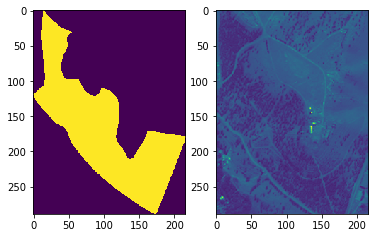

(62424L,)
(8L, 62424L)
-----------------------------------------

image for OSM-way-61976350 is good object: 1
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


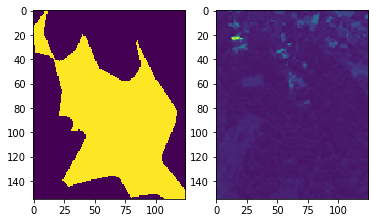

(81799L,)
(8L, 81799L)
-----------------------------------------

Multipolygon - skipping object: 2

-----------------------------------------

image for OSM-way-224459609 is good object: 3
2016-11-09T08:01:26.047Z
1030010061CF0900
Wood


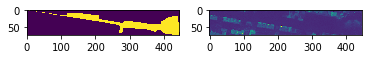

(113839L,)
(8L, 113839L)
-----------------------------------------

image for OSM-way-75659971 is good object: 4
2017-11-13T08:15:21.999Z
1040010035BF7700
Forest


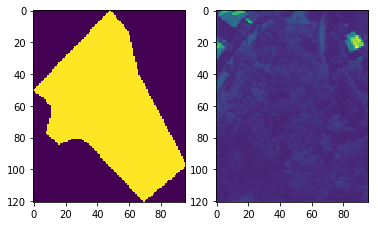

(125455L,)
(8L, 125455L)
-----------------------------------------

image for OSM-way-75237277 is good object: 5
2017-09-14T07:59:55.356Z
1030010070409100
Forest


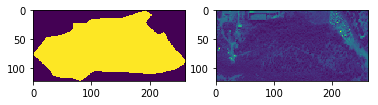

(157419L,)
(8L, 157419L)
-----------------------------------------

image for OSM-way-95490138 is good object: 6
2017-11-13T08:15:21.999Z
1040010035BF7700
Forest


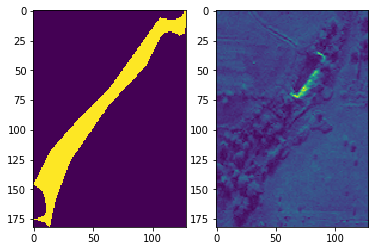

(180715L,)
(8L, 180715L)
-----------------------------------------

image for OSM-way-62944139 is good object: 7
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


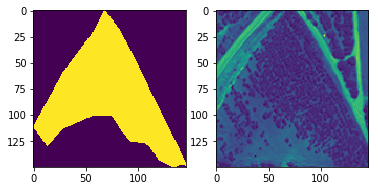

(202615L,)
(8L, 202615L)
-----------------------------------------

image for OSM-way-75589821 is good object: 8
2017-09-14T07:59:55.356Z
1030010070409100
Forest


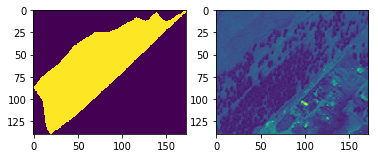

(226695L,)
(8L, 226695L)
-----------------------------------------

Multipolygon - skipping object: 9

-----------------------------------------

image for OSM-way-282632289 is good object: 10
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


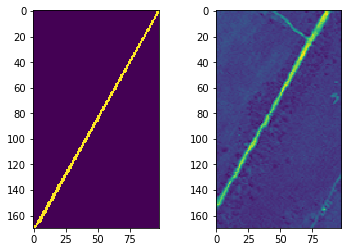

(243355L,)
(8L, 243355L)
-----------------------------------------

image for OSM-way-75610624 is good object: 11
2017-09-14T07:59:55.356Z
1030010070409100
Forest


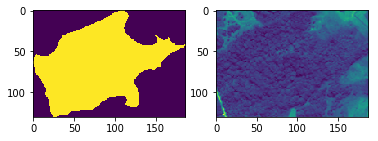

(267852L,)
(8L, 267852L)
-----------------------------------------

Multipolygon - skipping object: 12

-----------------------------------------

Multipolygon - skipping object: 13

-----------------------------------------

image for OSM-way-61060039 is good object: 14
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


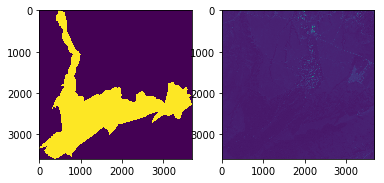

(13493505L,)
(8L, 13493505L)
-----------------------------------------

image for OSM-way-363443293 is good object: 15
2017-09-14T07:59:55.356Z
1030010070409100
Forest


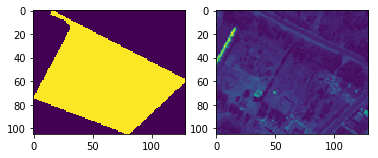

(13507050L,)
(8L, 13507050L)
-----------------------------------------

Multipolygon - skipping object: 16

-----------------------------------------

image for OSM-way-74042486 is good object: 17
2017-09-14T07:59:55.356Z
1030010070409100
Forest


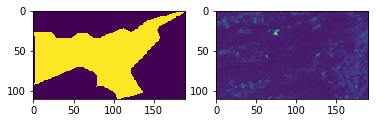

(13527950L,)
(8L, 13527950L)
-----------------------------------------

image for OSM-way-62690946 is good object: 18
2017-09-14T07:59:55.356Z
1030010070409100
Forest


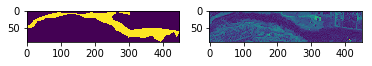

(13568809L,)
(8L, 13568809L)
-----------------------------------------

image for OSM-way-95488638 is good object: 19
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


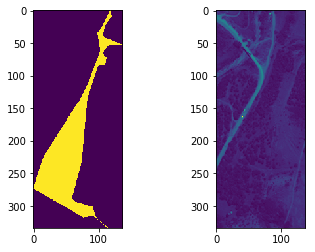

(13614567L,)
(8L, 13614567L)
-----------------------------------------

no image
-----------------------------------------

Multipolygon - skipping object: 21

-----------------------------------------

image for OSM-way-63958409 is good object: 22
2017-09-14T07:59:55.356Z
1030010070409100
Meadow


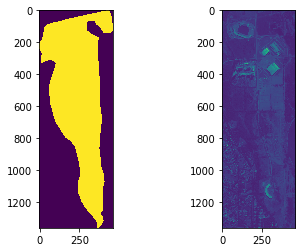

(14237905L,)
(8L, 14237905L)
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-120789463 is good object: 24
2017-09-14T07:59:55.356Z
1030010070409100
Meadow


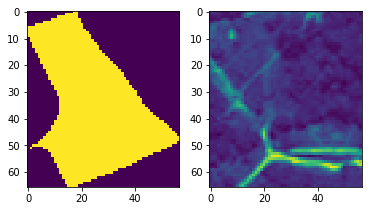

(14241667L,)
(8L, 14241667L)
-----------------------------------------

image for OSM-way-363705029 is good object: 25
2017-09-14T07:59:55.356Z
1030010070409100
Meadow


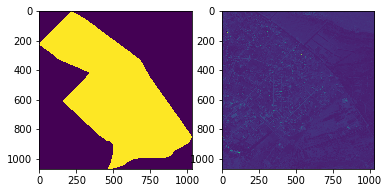

(15343806L,)
(8L, 15343806L)
-----------------------------------------

image for OSM-way-190581279 is good object: 26
2017-09-14T07:59:55.356Z
1030010070409100
Meadow


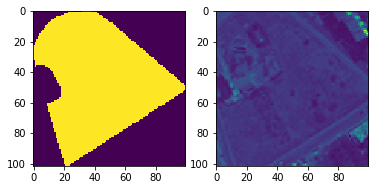

(15354006L,)
(8L, 15354006L)
-----------------------------------------

Multipolygon - skipping object: 27

-----------------------------------------

image for OSM-way-361889662 is good object: 28
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


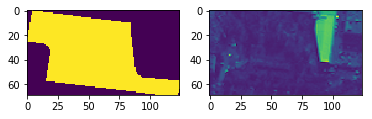

(15362562L,)
(8L, 15362562L)
-----------------------------------------

image for OSM-way-65082801 is good object: 29
2016-11-09T08:01:26.047Z
1030010061CF0900
Grass


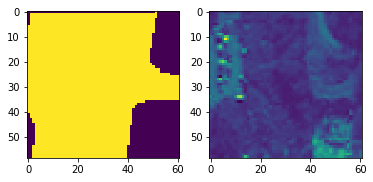

(15366161L,)
(8L, 15366161L)
-----------------------------------------

image for OSM-way-171198864 is good object: 30
2016-05-25T08:00:30.479Z
10300100570CBD00
Meadow


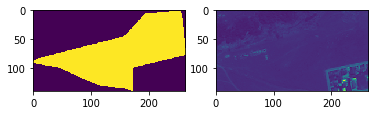

(15403121L,)
(8L, 15403121L)
-----------------------------------------

no image
-----------------------------------------

Multipolygon - skipping object: 32

-----------------------------------------

Multipolygon - skipping object: 33

-----------------------------------------

image for OSM-way-65372046 is good object: 34
2017-09-14T07:59:55.356Z
1030010070409100
Meadow


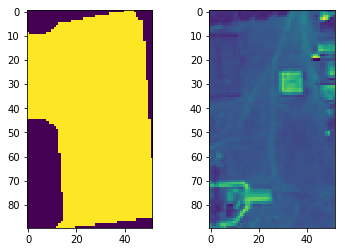

(15407801L,)
(8L, 15407801L)
-----------------------------------------

image for OSM-way-62672543 is good object: 35
2017-09-14T07:59:55.356Z
1030010070409100
Pitch


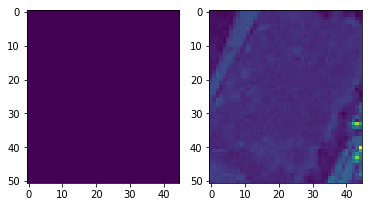

(15410096L,)
(8L, 15410096L)
-----------------------------------------

image for OSM-way-75659011 is good object: 36
2016-05-17T07:55:44.718Z
10300100543AA700
Grass


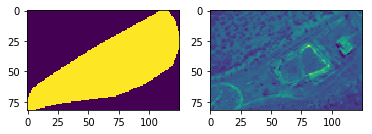

(15420346L,)
(8L, 15420346L)
-----------------------------------------

Multipolygon - skipping object: 37

-----------------------------------------

image for OSM-way-80378606 is good object: 38
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


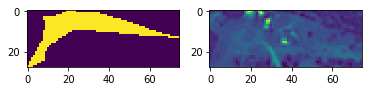

(15422446L,)
(8L, 15422446L)
-----------------------------------------

image for OSM-way-187631383 is good object: 39
2017-09-14T07:59:55.356Z
1030010070409100
Grass


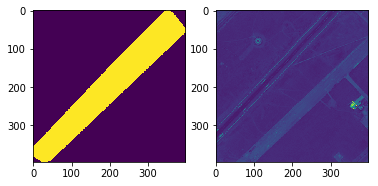

(15580054L,)
(8L, 15580054L)
-----------------------------------------

image for OSM-way-62444677 is good object: 40
2017-09-14T07:59:55.356Z
1030010070409100
Water


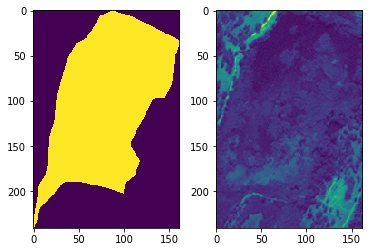

(15619096L,)
(8L, 15619096L)
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-59530670 is good object: 42
2017-09-14T07:59:55.356Z
1030010070409100
Water


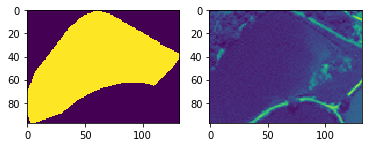

(15632032L,)
(8L, 15632032L)
-----------------------------------------

Multipolygon - skipping object: 43

-----------------------------------------

image for OSM-way-20642261 is good object: 44
2017-09-14T07:59:55.356Z
1030010070409100
Water


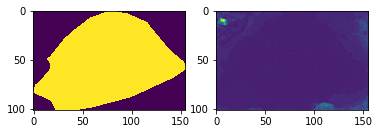

(15647687L,)
(8L, 15647687L)
-----------------------------------------

image for OSM-way-28043570 is good object: 45
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


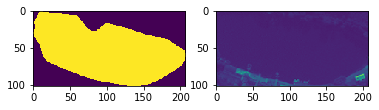

(15668801L,)
(8L, 15668801L)
-----------------------------------------

image for OSM-way-57953880 is good object: 46
2017-09-14T07:59:55.356Z
1030010070409100
Water


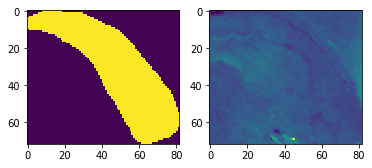

(15674705L,)
(8L, 15674705L)
-----------------------------------------

image for OSM-way-62444524 is good object: 47
2017-09-14T07:59:55.356Z
1030010070409100
Water


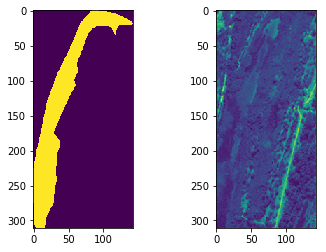

(15719178L,)
(8L, 15719178L)
-----------------------------------------

image for OSM-way-20574622 is good object: 48
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


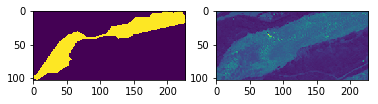

(15742559L,)
(8L, 15742559L)
-----------------------------------------

image for OSM-way-33767672 is good object: 49
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


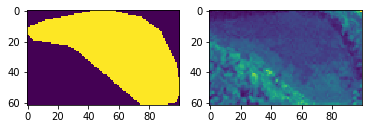

(15748759L,)
(8L, 15748759L)
-----------------------------------------

image for OSM-way-59530668 is good object: 50
2017-09-14T07:59:55.356Z
1030010070409100
Water


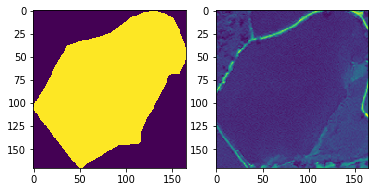

(15776974L,)
(8L, 15776974L)
-----------------------------------------

image for OSM-way-20574925 is good object: 51
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


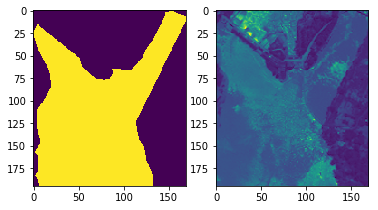

(15809929L,)
(8L, 15809929L)
-----------------------------------------

image for OSM-way-167318961 is good object: 52
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


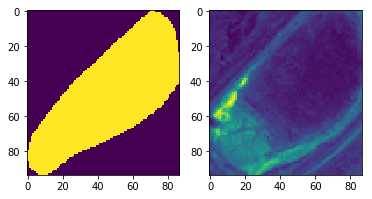

(15818107L,)
(8L, 15818107L)
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-20575140 is good object: 54
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


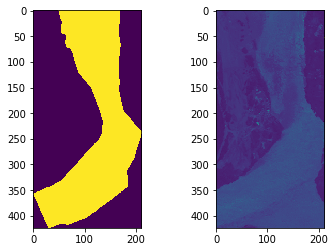

(15907571L,)
(8L, 15907571L)
-----------------------------------------

Multipolygon - skipping object: 55

-----------------------------------------

image for OSM-way-33767491 is good object: 56
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


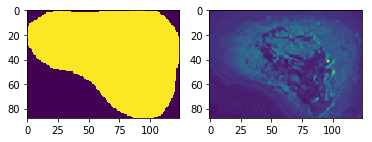

(15918483L,)
(8L, 15918483L)
-----------------------------------------

image for OSM-way-59530669 is good object: 57
2017-09-14T07:59:55.356Z
1030010070409100
Water


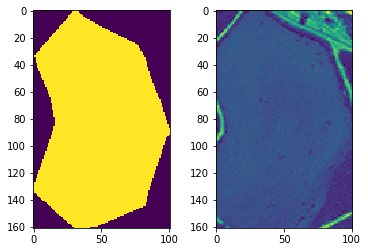

(15934744L,)
(8L, 15934744L)
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-62449591 is good object: 59
2017-09-14T07:59:55.356Z
1030010070409100
Water


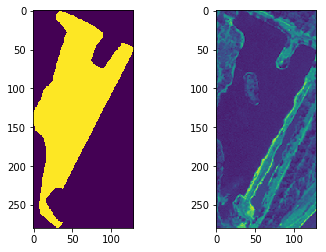

(15970864L,)
(8L, 15970864L)
-----------------------------------------

image for OSM-way-57941386 is good object: 60
2017-09-14T07:59:55.356Z
1030010070409100
Building


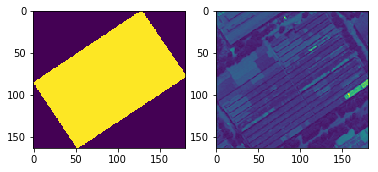

(16000367L,)
(8L, 16000367L)
-----------------------------------------

image for OSM-way-62154959 is good object: 61
2017-09-14T07:59:55.356Z
1030010070409100
Building


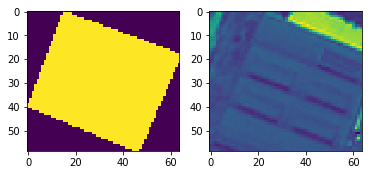

(16004143L,)
(8L, 16004143L)
-----------------------------------------

image for OSM-way-58756399 is good object: 62
2017-09-14T07:59:55.356Z
1030010070409100
Building


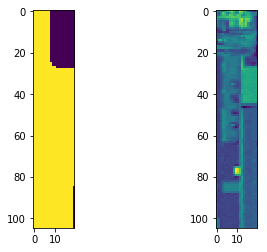

(16006243L,)
(8L, 16006243L)
-----------------------------------------

image for OSM-way-422389476 is good object: 63
2017-11-13T08:15:21.999Z
1040010035BF7700
Building


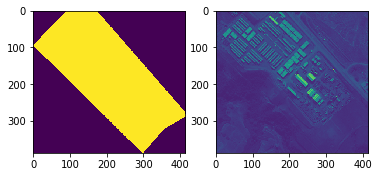

(16167263L,)
(8L, 16167263L)
-----------------------------------------

image for OSM-way-78298966 is good object: 64
2017-09-14T07:59:55.356Z
1030010070409100
Building


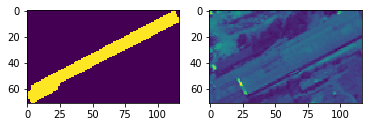

(16175570L,)
(8L, 16175570L)
-----------------------------------------

Multipolygon - skipping object: 65

-----------------------------------------

image for OSM-way-61606282 is good object: 66
2017-09-14T07:59:55.356Z
1030010070409100
Building


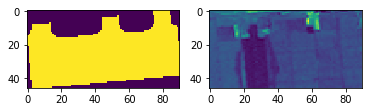

(16179710L,)
(8L, 16179710L)
-----------------------------------------

image for OSM-way-78164383 is good object: 67
2017-09-14T07:59:55.356Z
1030010070409100
Building


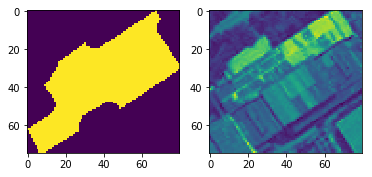

(16185710L,)
(8L, 16185710L)
-----------------------------------------

Multipolygon - skipping object: 68

-----------------------------------------

image for OSM-way-57711720 is good object: 69
2017-09-14T07:59:55.356Z
1030010070409100
Building


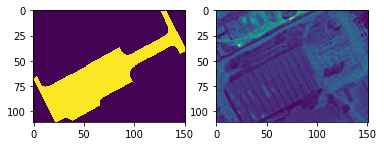

(16202471L,)
(8L, 16202471L)
-----------------------------------------

image for OSM-way-59528640 is good object: 70
2017-09-14T07:59:55.356Z
1030010070409100
Building


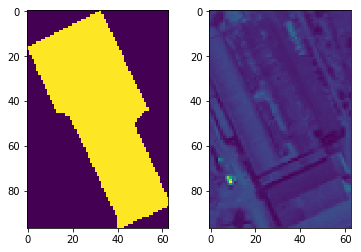

(16208582L,)
(8L, 16208582L)
-----------------------------------------

image for OSM-way-25753200 is good object: 71
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


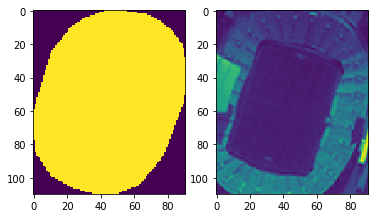

(16218592L,)
(8L, 16218592L)
-----------------------------------------

image for OSM-way-58436916 is good object: 72
2017-09-14T07:59:55.356Z
1030010070409100
Building


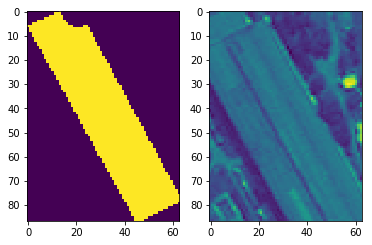

(16224073L,)
(8L, 16224073L)
-----------------------------------------

image for OSM-way-57792711 is good object: 73
2017-11-13T08:15:21.999Z
1040010035BF7700
Building


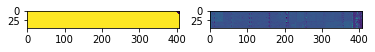

(16242795L,)
(8L, 16242795L)
-----------------------------------------

image for OSM-way-58436398 is good object: 74
2017-09-14T07:59:55.356Z
1030010070409100
Building


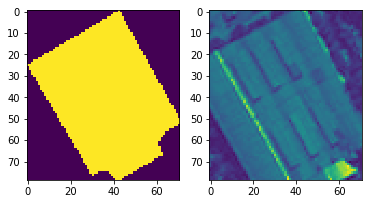

(16248404L,)
(8L, 16248404L)
-----------------------------------------

image for OSM-way-58791496 is good object: 75
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


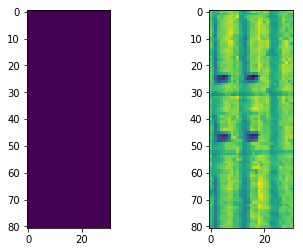

(16250915L,)
(8L, 16250915L)
-----------------------------------------

image for OSM-way-34148419 is good object: 76
2017-09-14T07:59:55.356Z
1030010070409100
Building


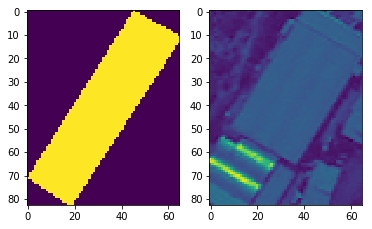

(16256310L,)
(8L, 16256310L)
-----------------------------------------

Multipolygon - skipping object: 77

-----------------------------------------

image for OSM-way-224230171 is good object: 78
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


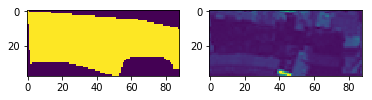

(16259654L,)
(8L, 16259654L)
-----------------------------------------

image for OSM-way-59466578 is good object: 79
2017-09-14T07:59:55.356Z
1030010070409100
Building


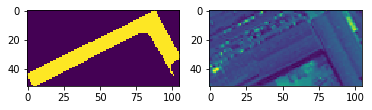

(16265114L,)
(8L, 16265114L)


In [42]:
################ this takes some time

from PIL import Image, ImageDraw
import copy
import numpy as np
    
for objects in selection_all.index:
    
    print '-----------------------------------------\n'
    ### setting a buffer can remove the polygon or make it into a multipolygon, both are unusable so check if this is the case
    park_utm = transform(project_utm, geom_list_selection_all[objects])  # apply projection
    
    # perform check # get x y coordinates of polygon and set a buffer if polygon is large enough
    if (park_utm.buffer(buffer_size).type != 'Polygon') | (park_utm.buffer(buffer_size).area == 0):
        
        message = "Multipolygon - skipping"
        
        print message + ' object: ' + str(objects) +'\n'
    
    else: 
        
        x,y = park_utm.buffer(buffer_size).exterior.xy

        park_buffer_wgs = transform(project_wgs,park_utm.buffer(buffer_size))  # apply projection  

        # get wgs projected x,y coordinates and create bounding box for image aquisition
        x_wgs,y_wgs = park_buffer_wgs.exterior.xy
        
        bbox_park_area_float = min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)

        bbox_park_area = str([min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)])

        bbox_park_area_str = nf.listToStringWithoutBrackets(bbox_park_area)

        # convert bounding box to well known format usable by GBDX tools
        bbox_wkt = box(*bbox_park_area_float).wkt

        selection_images = nf.image_query_check(bbox_wkt,park_utm,buffer_size,project_wgs,x_wgs,y_wgs)

        if not selection_images.empty:
            
            # set park bounding box 
            bbox = env.inputs.get('bbox', bbox_park_area_str)

            # set catalog id from selection
            catalog_id = env.inputs.get('catalog_id', selection_images.id[0])

            # collect image
            image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")),
                                 proj=UTM_EPSG_code,pansharpen=False)

            #create array from GBDX image
            image_array = image[:,:,:].read()

            # get second band to see if image is defective (some images show only black)
            # use image if not defective, otherwise 
            if (image_array.size == 0):
                
                print('no image')
            
            elif (image_array[1,:,:].min() != 0) :
                
                
                print 'image for ' + selection_all.OSM_id[objects] + ' is good object: ' + str(objects )
                print image.ipe_metadata["image"]["acquisitionDate"]
                print image.cat_id
                print selection_all.item_type[objects]
                #print 'Master Type: %s' % dict_type[selection_all.item_type[objects]]

                # resize polygon and plot polygon over image
                # subtract minimal values from utm polygon x and y to set 0,0 point as start 
                x1 = np.subtract(x, min(x))
                y1 = np.subtract(y, min(y))

                # devide the x and y coordinate of the polygon by the size of the image to match both sizes 
                x2 = np.divide(x1,max(x1)/image.shape[2])
                y2 = np.divide(y1,max(y1)/image.shape[1])

                n_bands, rows, cols  = image.shape

                # calculate total cells for each class by masking and setting pixel values to 1

                # create sequence of edited x and y coordinates, width and heigth  for use in ImageDraw function
                polygon = [(x2[i], y2[i]) for i in range(len(x2))]
                width = image.shape[2]
                height = image.shape[1]
                                                                   
                # convert polygon coordinates to raster/array values using ImageDraw
                img = Image.new('L', (width, height), 0)
                ImageDraw.Draw(img).polygon(polygon, fill=dict_type[selection_all.item_type[objects]])
               
                # convert image to array and set as mask
                mask = np.array(img)

                # flip the array for matching with the mask array
                image_array_flipped = np.fliplr(image_array[:,:,:])
                reshaped_data = image_array_flipped.reshape(8,(rows*cols))
                reshaped_label = mask.reshape(1,(rows*cols))
                
                # check if this is the first iteration, if so add the first data set otherwise:
                # append the new image data to the other data
                if data_all.size == 0:
                    
                    data_all = reshaped_data 
                    
                else: 
                    
                    data_all = np.concatenate((data_all,reshaped_data), axis = 1)
                
                label_all = np.append(label_all,reshaped_label)
                
                # Two subplots, the axes array is 1-d
                f, axarr = plt.subplots(1,2)
                axarr[0].imshow(mask)
                axarr[1].imshow(image_array_flipped[1])
                
                
                plt.show()
            
                print label_all.shape
                print data_all.shape
             
                
            else:
                
                print 'image defective' 
                # move to next without doing analysis

        else:

            print 'no image' 
            # move to next without doing analysis      
            
################ this takes a long time

In [43]:
### Remove pixels without class

label_all_no0 = label_all[label_all != 0]
data_all_no0 = data_all[:,label_all != 0]

In [44]:
### write data to pickle

pick = r'C:\Users\charl\Documents\GOST\Georgia\pickle'

import pickle

with open(os.path.join(pick, 'selection_objects_all_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(selection_all, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(os.path.join(pick, 'geom_list_selection_all{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(geom_list_selection_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(os.path.join(pick, 'project_utm_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(project_utm, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(os.path.join(pick, 'project_wgs_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(project_wgs, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(os.path.join(pick, 'UTM_EPSG_code_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(UTM_EPSG_code, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(os.path.join(pick, 'label_all_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(label_all_no0, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(os.path.join(pick, 'data_all_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(data_all_no0, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

from osgeo import gdal
from sklearn import metrics

# A list of "random" colors (for a nicer output)
COLORS = ["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941"]

### import data from other notebook

pick = r'C:\Users\charl\Documents\GOST\Georgia\pickle'

with open(os.path.join(pick, 'data_all_{}.pickle'.format(city)), 'rb') as handle:
    data_all = pickle.load(handle)
    
with open(os.path.join(pick, 'label_all_{}.pickle'.format(city)), 'rb') as handle:
    label_all = pickle.load(handle)
    
data = pd.DataFrame(data_all.T)

data['class'] = label_all

# Calculate NDVI

# 8-band (0:Coastal, 1:Blue, 2:Green, 3:Yellow, 4:Red, 5:Red-edge, 6:NIR1, 7:NIR2) Multispectral

# ndvi = (nir - red)/(nir + red)

# EVI = 2.5 * ( nir - red ) / ( nir + 6.5 * red - 7.5 * blue+ 1.0 )

data['ndvi'] = (data[6] - data[4])/(data[6] + data[4])

data['EVI'] = 2.5 * (data[6] - data[4]) / (data[6] + 6.5 * data[4] - 7.5 * data[1] + 1 )

data['water_index'] = (data[7] - data[0]) / (data[7] + data[0])

X = data.iloc[:,0:8]

y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# initialize search space (as a library!)
param_grid = {
    
}

gs = make_pipeline(     StandardScaler(), 
                        GridSearchCV(RandomForestClassifier(min_samples_leaf=2),
                        param_grid = param_grid,
                        cv = 2,
                        refit = True,
                        n_jobs = 1,
                        verbose = 2))

# Instantiate random forest. You can specify default parameters here.
# These parameters are not being optimized.

# initialize grid search
#gs = GridSearchCV(rf, param_grid, verbose=2)#,scoring='roc_auc')

gs.fit(X_train,y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV]  ................................................................
[CV] ................................................. , total=  59.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] ................................................. , total=  57.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min finished


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gridsearchcv', GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=N...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2))])

In [46]:
y_pred = gs.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        1.0       0.99      0.98      0.98   1096151
        2.0       0.89      0.93      0.91    292493
        3.0       0.97      0.91      0.94     58627
        4.0       0.84      0.81      0.82     47596

avg / total       0.96      0.96      0.96   1494867



In [47]:
# write trained classifier to pickle
with open(os.path.join(pick,'trained_classifier_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(gs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
bbox = gpd.read_file(r'C:\Users\charl\Documents\GOST\Georgia\Admin_Boundary\bbox_test.shp')
bbox = bbox.to_crs({'init' :'epsg:4326'})
bbox = bbox.geometry.loc[0]
bbox = str(bbox.bounds).replace('(',"").replace(')',"")
UTM_EPSG_code = 'EPSG:32638'
catalog_id = '1030010061CF0900'
image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")),
                                 proj=UTM_EPSG_code,pansharpen=False)
image_array = image.read()

In [49]:
# (8, 312, 531)
# n_b, r, c

n_bands, rows, cols = image_array.shape

n_samples = rows*cols

# image_array_flipped = np.fliplr(image_array[:,:,:])
reshaped_data = image_array.reshape(8,(rows*cols))

In [50]:
result = gs.predict(reshaped_data.T)
classification = result.T.T.T.reshape((rows, cols))

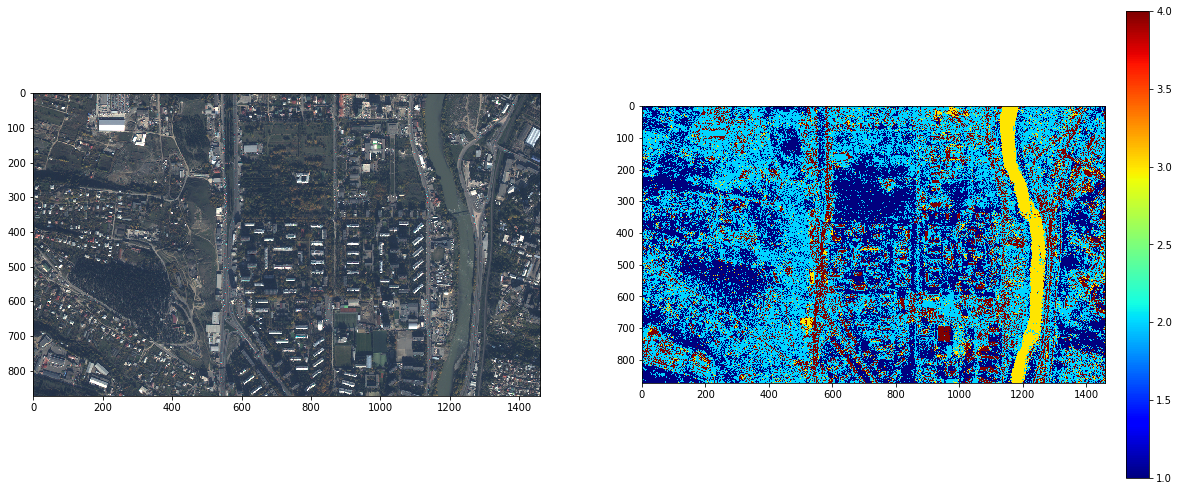

In [51]:
# dict_type = {'Forest': 1,'Wood': 1,'Nature Reserve': 1,'Wetland': 1, 'Grass': 2, 'Water': 3, 'Building': 4}

from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib import pyplot as plt
f = plt.figure( figsize = (20,20))
f.add_subplot(1, 2,1)
r = image_array[3,:,:]
g = image_array[2,:,:]
b = image_array[1,:,:]
rgb = np.dstack([r,g,b])
f.add_subplot(1, 2, 1)
plt.imshow(rgb/3000)
f.add_subplot(1, 2, 2)

im = plt.imshow(classification,cmap='jet')

plt.colorbar(im,fraction=0.046, pad=0.04)